In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# what is the distribution of age among heart failures patients in the dataset

In [11]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

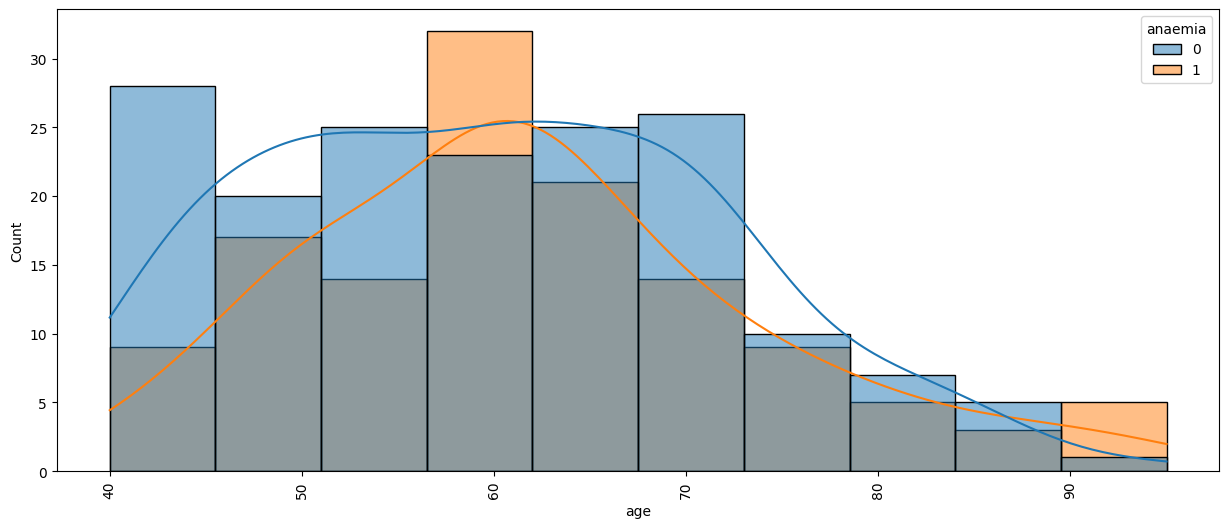

In [12]:
plt.figure(figsize = (15,6))
sns.histplot(data  = df,x = 'age',hue= 'anaemia',kde = True)
plt.xticks(rotation = 90)
plt.show()

# most of the persons who have anaemia are from age of 58 to 63

# 2. how does the death rate vary with age?

In [13]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [28]:
data1 = df[['DEATH_EVENT','age']].sort_values(by = 'age')

<Axes: xlabel='DEATH_EVENT', ylabel='age'>

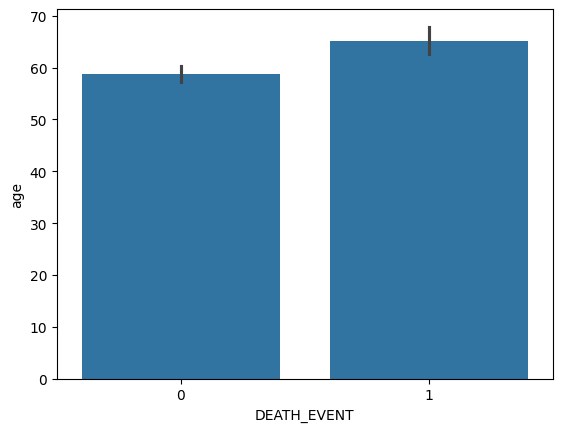

In [29]:
sns.barplot(data = data1,x = 'DEATH_EVENT',y = 'age')
# plt.xticks(rotation = 45)
# plt.show()

# what is the percentage of male and female patients in the data set

In [ ]:

df.sex.value_counts(normalize = True)

# conclusion:- About 64% of data belongs to males 
# 35% of data are females in this data set

In [ ]:
sns.countplot(data = df,x = 'sex')

# how does the platelet count vary among differnet age groups?

<Axes: xlabel='platelets', ylabel='age'>

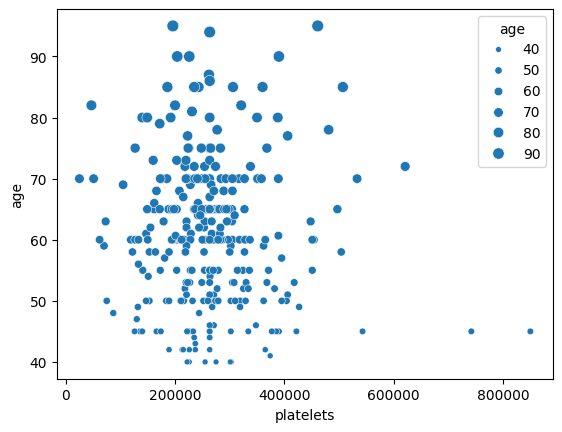

In [30]:

sns.scatterplot(data = df,x = 'platelets',y= 'age',size = 'age')

# is there a correlation between sodiam and creatinine levels in the blood?

In [31]:

correlation = df['serum_creatinine'].corr(df['serum_sodium'])
print("correlation between creatinine and sodium",correlation)

correlation between creatinine and sodium -0.18909521009117392


# the correlation  i got is -0.1890952100911741 which indicates a week negative correlation between these two columns 

<Axes: xlabel='serum_creatinine', ylabel='serum_sodium'>

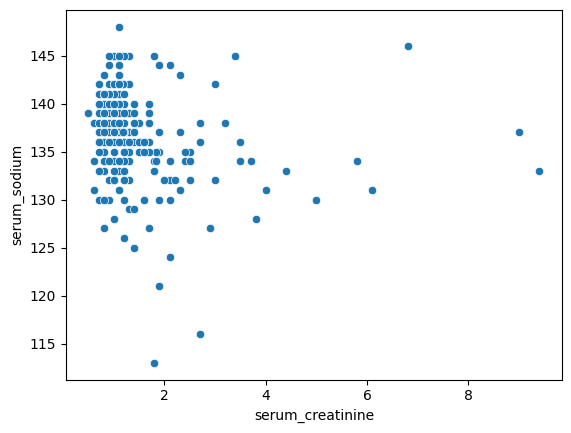

In [32]:
sns.scatterplot(data = df,x = 'serum_creatinine',y = 'serum_sodium')

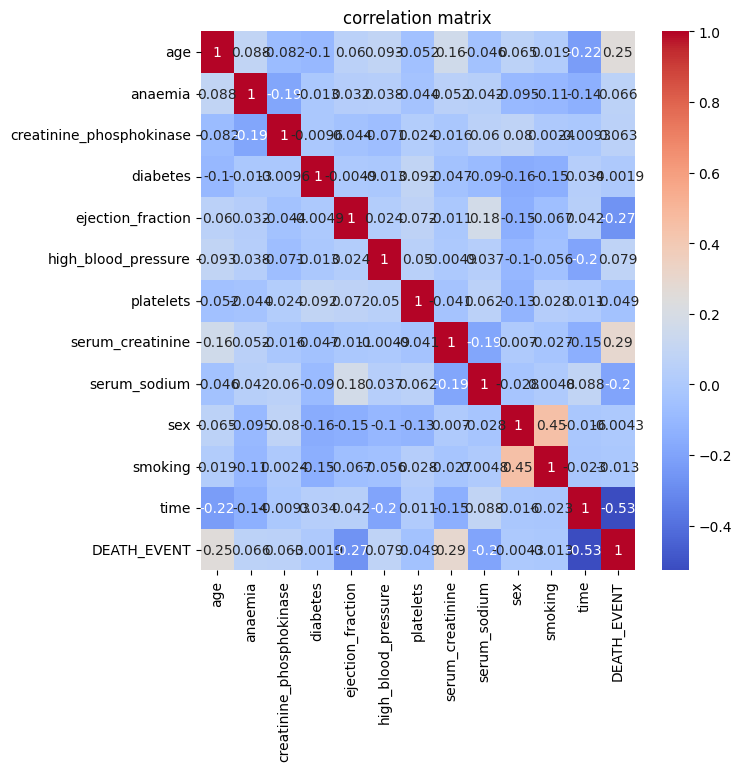

In [33]:
correlation_matrix = df.corr()
plt.figure(figsize = (7,7))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("correlation matrix")
plt.show()

In [ ]:
# how does the prevalance of high blood pressure differ male and female patients?
df[['high_blood_pressure','sex']]

In [ ]:
df.columns

In [ ]:
df['diabetes'].unique()

# are there any signigicant diffenrence in ejection fraction between patients with or without diabetes


In [ ]:
df.groupby('diabetes')['ejection_fraction'].count()

In [ ]:
sns.countplot(data = df,hue= 'ejection_fraction',x= 'diabetes',dodge=True)

# how does the serum creatinine level vary between pateients who survived and those who did not?

In [35]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [34]:
df.groupby("DEATH_EVENT")['serum_creatinine'].count()

DEATH_EVENT
0    203
1     96
Name: serum_creatinine, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

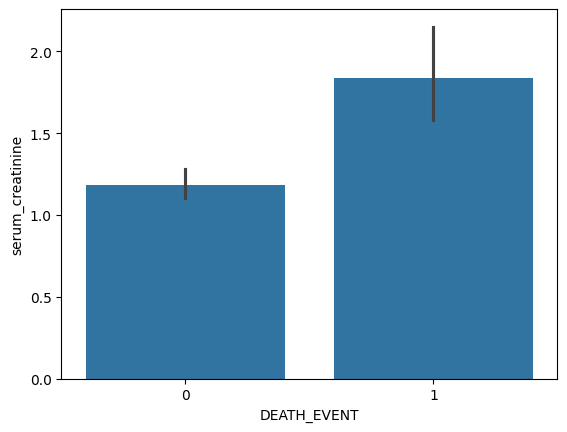

In [36]:
sns.barplot(data = df,x = 'DEATH_EVENT',y = 'serum_creatinine')

# what is the relationship between smoking habits and the occurance of heart failure?

In [37]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [39]:
df['smoking'].unique()

array([0, 1], dtype=int64)

In [47]:
df.groupby('smoking')['anaemia'].value_counts()

smoking  anaemia
0        0          108
         1           95
1        0           62
         1           34
Name: count, dtype: int64

<Axes: xlabel='anaemia', ylabel='smoking'>

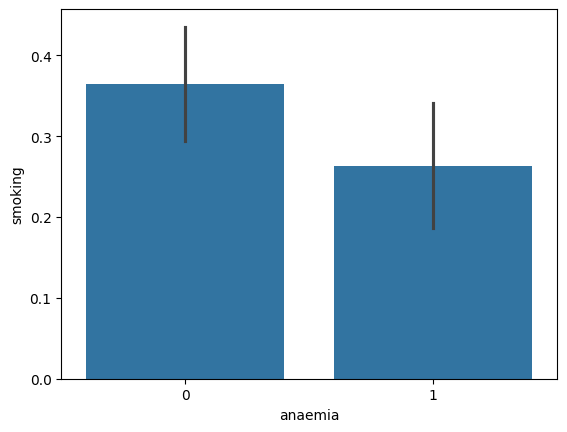

In [52]:
sns.barplot(data = df,y ='smoking',x= 'anaemia')

<Axes: xlabel='smoking', ylabel='anaemia'>

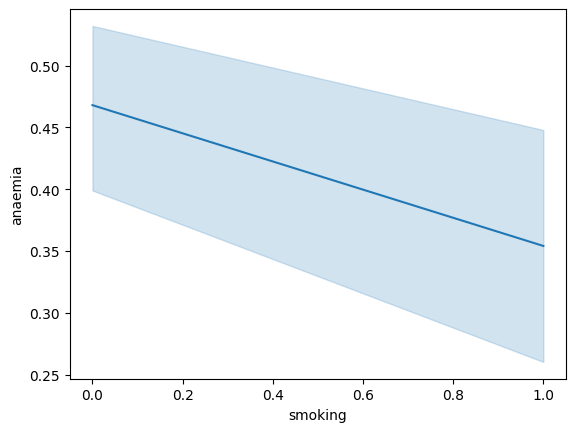

In [54]:
sns.lineplot(data =df,y = 'anaemia',x = 'smoking')

# how does the prevalance of high blood pressure differ between males and female patients?

In [55]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<Axes: xlabel='high_blood_pressure'>

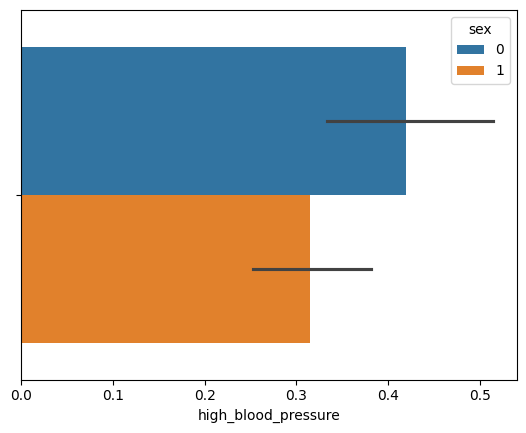

In [65]:
sns.barplot(data =df,x  = 'high_blood_pressure',hue= 'sex')

0      1
1      1
2      1
3      1
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: sex, Length: 299, dtype: int64